# Part 1: Data scrapping and preparation

## Step 1: Scrapping your competitor's data

In [1]:
import re
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
try:
    from urllib.parse import urlparse
except ImportError:
    from urlparse import urlparse

# HTTP GET request sent to the URL url
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
r = requests.get(url, headers=headers)

# Use BeautifulSoup to parse the GET response
root = BeautifulSoup(r.content, "lxml")
# print(root.prettify())
html_table = root.find("div", id="SWL_Page").find("table")
table = pd.read_html(str(html_table))
df = table[0]
df.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']
df

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="Top 5

## Step 2: Tidy the top 50 solar flare data

In [114]:
# droping the last column
if 'movie' in df.columns:
    df = df.drop('movie', axis=1)
# reordering the columns
columns=['rank', 'x_classification', 'date', 'start_time', 'maximum_time', 'end_time', 'region']
df = df[columns]
# combining datetime for three of the times
start_datetime = pd.to_datetime(df['date']+ ' ' + df['start_time'])
start_datetime = start_datetime.to_frame()
max_datetime = pd.to_datetime(df['date']+ ' ' + df['maximum_time'])
max_datetime = max_datetime.to_frame()
end_datetime = pd.to_datetime(df['date']+ ' ' + df['end_time'])
end_datetime = end_datetime.to_frame()
for i in df.index:
    df.at[i, 'start_time'] = start_datetime.at[i, 0]
    df.at[i, 'maximum_time'] = max_datetime.at[i, 0]
    df.at[i, 'end_time'] = end_datetime.at[i, 0]
# drop date column
if 'date' in df.columns:
    df = df.drop('date', axis=1)
# rename columns
df.columns=['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']
df

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


## Step 3: Scrape the NASA data

In [115]:
# HTTP GET request sent to the URL url
nasa_url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'}
r = requests.get(nasa_url)

# Use BeautifulSoup to parse the GET response
root = BeautifulSoup(r.content, "lxml")
# print(root.prettify())
html_table = root.find("pre")
string_table = html_table.get_text()
string_table = string_table.split('\n')
string_table = string_table[12:len(string_table) - 2]
df1 = pd.DataFrame(columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification', 
                            'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'plot'], index = range(0,len(string_table)))
row_index = 0
for line in string_table:
    # get each row from the table
    columns = line.split(' ')
    # remove empty string column from the table
    while '' in columns:
        columns.remove('')
    col_index = 0
    # read each column into dataframe
    while col_index <= 14:
        df1.iat[row_index, col_index] = columns[col_index]
        col_index += 1
    row_index += 1
df1

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


## Step 4: Tidy the NASA table

In [116]:
# replace all missing entries as NaN
df1 = df1.replace('----', np.nan).replace('-----', np.nan).replace('------', np.nan).replace('????', np.nan).replace('---', np.nan)
# create a new column for halo flares
df1['is_halo'] = df1['cme_angle'].map(lambda x: x == 'Halo')
# replace all 'Halo' as 'NA'
df1 = df1.replace('Halo', np.nan)
# create a new column for width lower bound
width_lower_bound = list()
for row in df1.index:
    width = str(df1.at[row, 'cme_width'])
    if width[0] == '>':
        width_lower_bound.append(True)
        # remove any non-numeric part of the width column
        df1.at[row, 'cme_width'] = width[1:]
    else:
        width_lower_bound.append(False)
        if len(width) > 3:
            df1.at[row, 'cme_width'] = width[:len(width) - 1]
df1['width_lower_bound'] = width_lower_bound
# combine data and time columns for start, end and cme
for row in range(0, len(string_table)):
    tempArr = df1['start_date'][row].split('/')
    year = tempArr[0]
    if df1['end_time'][row] == '24:00':
        df1.at[row, 'end_time'] = '00:00'
        temp = df1.at[row, 'end_date'].split('/')
        inc_day = int(temp[1]) + 1
        if inc_day < 10:
            df1.at[row, 'end_date'] = temp[0] + '/0' + str(inc_day)
        else:
            df1.at[row, 'end_date'] = temp[0] + '/' + str(inc_day)
    dayMonth = df1['end_date'][row]
    cme_date = df1['cme_date'][row]
    df1.at[row, 'end_date'] = year + '/' + dayMonth
    df1.at[row, 'cme_date'] = year + '/' + cme_date
start_datetime = pd.to_datetime(df1['start_date']+ ' ' + df1['start_time'])
end_datetime = pd.to_datetime(df1['end_date']+ ' ' + df1['end_time'])
cme_datetime = pd.to_datetime(df1['cme_date']+ ' ' + df1['cme_time'], errors='coerce')
start_datetime = start_datetime.to_frame()
end_datetime = end_datetime.to_frame()
cme_datetime = cme_datetime.to_frame()
for i in df1.index:
    df1.at[i, 'start_date'] = start_datetime.at[i, 0]
    df1.at[i, 'end_date'] = end_datetime.at[i, 0]
    df1.at[i, 'cme_date'] = cme_datetime.at[i, 0]
df1 = df1.drop(columns=['start_time', 'end_time', 'cme_time'])
# making sure all nan value is np.nan
df1 = df1.replace({np.nan: np.nan})
df1.columns=['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','importance', 
                            'cme_datetime', 'cpa', 'width', 'speed', 'plot', 'is_halo', 'width_lower_bound']
pd.set_option('display.max_rows', None)
df1

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


# Part 2: Analysis
## Question 1: Replication

In [117]:
# get all rows with x class flare
x_class_flare = list()
for row in df1.index:
    x_class = str(df1.at[row, 'importance'])
    if x_class[0] == 'X':
        x_class_flare.append((row, x_class[1:]))
# sort the list by descending order of float number following the x class
x_class_flare.sort(reverse=True, key= lambda x: float(x[1]))
# extract only the relevant row
sorted_x_class_flare = [flare[0] for flare in x_class_flare]
topFlares = df1.loc[sorted_x_class_flare]
# get top 50 flares from dataframe
topFlares = topFlares.head(50)
# reindex the top 50 flares
topFlares.index = [i for i in range(50)]
topFlares

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
2,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
4,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
6,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False
9,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False


As you can see from the output, I am able to replicate a table similar to the table in SpaceWeatherLive.com. I've reindex the top flares in NASA table to be consistent with the indexing in table of SpaceWeatherLive.com. Since there is some missing values and times in the NASA table, I will represent them with NaN. Since the table in SpaceWeatherLive.com is everchanging, I will not get the exact table but will be able to get a similar table.

## Question 2: Integration

In [118]:
# copy the SpaceWeatherLive.com table
swltop = df
# copy the NASA table
nasatable = df1
# add new column to NASA table to indicate the corresponding rank of matched row in swltable
nasatable['rank_in_swl'] = pd.Series(np.nan, index=nasatable.index)
# function to find the best match row in Nasa table 
def match(index, remove_list):
    nasa_index = nasatable.index
    # find best match using flare classification and region
    for i in nasa_index:
        x_class = str(swltop.at[index, 'x_class'])
        region = str(swltop.at[index, 'region'])
        importance = str(nasatable.at[i, 'importance'])
        flare_region = str(nasatable.at[i, 'flare_region'])
        # remove unecessary character
        if x_class[len(x_class) - 1] == '+':
            x_class = x_class[:len(x_class) - 1]
        # ensure data format consistency between the two classification for better comparision
        number = x_class[1:]
        x_class = x_class[0] + str(float(number))
        number = importance[1:]
        if number[0].isnumeric():
            importance = importance[0] + str(float(number))
        # ensure data format consistency between the two region for better comparision
        if len(flare_region) > 4:
            flare_region = flare_region[1:]
            flare_region = str(int(flare_region))
            
        # if x_class and region the same found best match
        if importance == x_class and flare_region == region:
            if i not in remove_list:
                remove_list.append(i)
                return i
            
    # find the right match using flare classification and start_datetime
    for i in nasa_index:
        x_class = str(swltop.at[index, 'x_class'])
        importance = str(nasatable.at[i, 'importance'])
        swl_start = swltop.at[index, 'start_datetime']
        nasa_start = nasatable.at[i, 'start_datetime']
        # remove unecessary character
        if x_class[len(x_class) - 1] == '+':
            x_class = x_class[:len(x_class) - 1]
        # ensure data format consistency between the two classification for better comparision
        number = x_class[1:]
        x_class = x_class[0] + str(float(number))
        number = importance[1:]
        if number[0].isnumeric():
            importance = importance[0] + str(float(number))
            
        # if x_class and start_datetime the same found best match
        if importance == x_class and nasa_start == swl_start:
            if i not in remove_list:
                remove_list.append(i)
                return i
            
    # continue finding the right match using flare classification only
    for i in nasa_index:
        x_class = str(swltop.at[index, 'x_class'])
        importance = str(nasatable.at[i, 'importance'])
        # remove unecessary character
        if x_class[len(x_class) - 1] == '+':
            x_class = x_class[:len(x_class) - 1]
        # ensure data format consistency between the two classification for better comparision
        number = x_class[1:]
        x_class = x_class[0] + str(float(number))
        number = importance[1:]
        if number[0].isnumeric():
            importance = importance[0] + str(float(number))
            
        # if x_class the same found best match
        if importance == x_class:
            if i not in remove_list:
                remove_list.append(i)
                return i
    
    # find best match using region only
    for i in nasa_index:
        region = str(swltop.at[index, 'region'])
        flare_region = str(nasatable.at[i, 'flare_region'])
        # ensure data format consistency between the two region for better comparision
        if len(flare_region) > 4:
            flare_region = flare_region[1:]
            flare_region = str(int(flare_region))
            
        # if region the same found best match
        if flare_region == region:
            if i not in remove_list:
                remove_list.append(i)
                return i
            
    # find the right match using start_datetime only
    for i in nasa_index:
        swl_start = swltop.at[index, 'start_datetime']
        nasa_start = nasatable.at[i, 'start_datetime']
        # if start_datetime the same found best match
        if nasa_start <= swl_start:
            if i not in remove_list:
                remove_list.append(i)
                return i
            
    # find the right match using end_datetime only
    for i in nasa_index:
        swl_end = swltop.at[index, 'end_datetime']
        nasa_end = nasatable.at[i, 'end_datetime']
        # if start_datetime the same found best match
        if nasa_end <= swl_end:
            if i not in remove_list:
                remove_list.append(i)
                return i
            
    # find the right match using max_datetime only
    for i in nasa_index:
        swl_max = swltop.at[index, 'max_datetime']
        nasa_max = nasatable.at[i, 'cme_datetime']
        # if start_datetime the same found best match
        if nasa_max <= swl_max:
            if i not in remove_list:
                remove_list.append(i)
                return i

# iterate each row in swltable to find best match
remove_list = list()
for i in swltop.index:
    temp = match(i, remove_list)
    rank = swltop.at[i, 'rank']
    nasatable.at[temp, 'rank_in_swl'] = rank
nasatable

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound,rank_in_swl
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,16.0
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,24.0
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,28.0
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False,30.0
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False,32.0
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False,38.0
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False,44.0
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,PHTX,True,False,45.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,7.0
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False,NaN


I have define the best matching using the following metrics:
1. Find best match if the flare classification and region is equal
2. Find next best match if the flare classification and start_datetime is equal
3. Find next best match if the flare classification is equal
4. Find next best match if the region is equal
5. Find next best match if the start_datetime is less than or equal to the start_datetime in SWL table
6. Find next best match if the end_datetime is less than or equal to the end_datetime in SWL table
7. Find next best match if the cme_datetime is less than or equal to the max_datetime in SWL table

which ever metric satisfy first in the metrics list will return the best matching for the corresponding row in SWL table.

## Question 3: Analysis

For the plot below, I would like to investigate the relationship between the freqency and width of the flare.

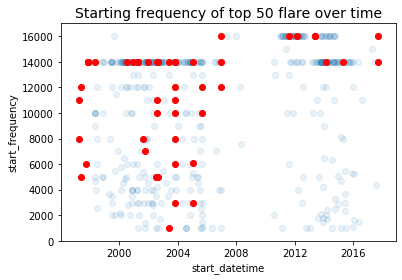

In [119]:
import matplotlib.pyplot as plt
nasatable = nasatable.astype({'start_frequency': 'float64'})
nasatable = nasatable.astype({'end_frequency': 'float64'})
nasatable = nasatable.astype({'width': 'float64'})
top_50_list = list()
# get ranked top 50 flare from nasatable
for i in nasatable.index:
    if nasatable.at[i, 'rank_in_swl'] > 0:
        top_50_list.append(i)
top50Flare = nasatable.loc[top_50_list]
# plot starting freqeuncy of top 50 flare in context of all flare over time
plt.scatter(nasatable.start_datetime, nasatable.start_frequency, alpha = 0.1)
plt.xlabel('start_datetime', size = 10)
plt.ylabel('start_frequency', size = 10)
plt.title('Starting frequency of top 50 flare over time', size = 14)
plt.scatter(top50Flare.start_datetime, top50Flare.start_frequency, color = 'red')

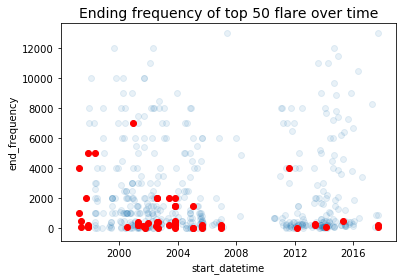

In [120]:
# plot ending frequency of top 50 flare in contecxt of all flare over time
plt.scatter(nasatable.start_datetime, nasatable.end_frequency, alpha = 0.1)
plt.xlabel('start_datetime', size = 10)
plt.ylabel('end_frequency', size = 10)
plt.title('Ending frequency of top 50 flare over time', size = 14)
plt.scatter(top50Flare.start_datetime, top50Flare.end_frequency, color = 'red')

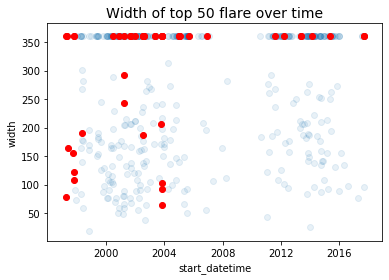

In [121]:
# plot width of top 50 flare in context of all flare over time
plt.scatter(nasatable.start_datetime, nasatable.width, alpha = 0.1)
plt.xlabel('start_datetime', size = 10)
plt.ylabel('width', size = 10)
plt.title('Width of top 50 flare over time', size = 14)
plt.scatter(top50Flare.start_datetime, top50Flare.width, color = 'red')

- For the first plot, it is a plot of starting frequency of the top 50 flare (Marked in red) in context of all solar flares over time.
- For the second plot, it is a plot of ending frequency of the top 50 flare (Marked in red) in context of all solar flares over time.
- For the third plot, it is a plot of eidth of the top 50 flare (Marked in red) in context of all solar flares over time.

For the top 50 flares, we can see that the frequency from the early 2000s to 2008 are almost identical to its ceiling. Comparing the frequency plot and the width plot, there seems to be a correlation between the frequency and the cme_width of the solar flares. When the frequency is high, the width is also high.

The plot below was intended to find out that do top 50 flares tend to have Halo CMEs

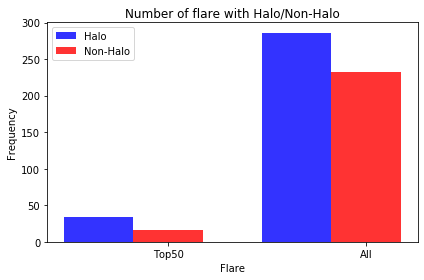

In [122]:
# plot bar graph for flares with Halo CMEs
t_top = 0
f_top = 0
t_all = 0
f_all = 0
# count halo for all flares
for i in nasatable.index:
    if nasatable.at[i, 'is_halo']:
        t_all += 1
    else:
        f_all += 1
# count halo for top 50
for i in top50Flare.index:
    if top50Flare.at[i, 'is_halo']:
        t_top += 1
    else:
        f_top += 1
# plot bar graph
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, [t_top, t_all], bar_width,
alpha=opacity,
color='b',
label='Halo')

rects2 = plt.bar(index + bar_width, [f_top, f_all], bar_width,
alpha=opacity,
color='r',
label='Non-Halo')

plt.xlabel('Flare')
plt.ylabel('Frequency')
plt.title('Number of flare with Halo/Non-Halo')
plt.xticks(index + bar_width, ('Top50', 'All'))
plt.legend()
plt.tight_layout()

The graph above shows that there is a big correlation between the top 50 flares and having halo cmes. As for all flares the onew with halos and without halos are more closer in frequency.